# 1. Lý thuyết

1)  Đặc diểm của kiến trúc RNN là gì ?

A. RNN là kiến trúc dự báo có tính thứ tự và tính truy hồi. Các dự báo được thực hiện theo tuần tự thời gian và output của các step trong tương lai được sử dụng như input của step hiện tại.

B. RNN là kiến trúc dự báo có tính thứ tự và tính truy hồi. Các dự báo được thực hiện một cách song song và output của các step trước được sử dụng như input của step hiện tại.

C. RNN là kiến trúc dự báo có tính thứ tự và tính truy hồi. Các dự báo được thực hiện theo tuần tự thời gian và output của các step trước được sử dụng như input của step hiện tại.

D. RNN là kiến trúc dự báo có tính thứ tự và tính truy hồi. Các dự báo được thực hiện theo chiều từ phải sang trái cho tới khi trở về vị trí đầu tiên.

ĐA: C

2) Nhận định nào sau đây là đúng về RNN?

A. Kiến trúc RNN dự báo song song các output một lúc.

B. Kiến trúc RNN không chia sẻ tham số giữa các units. Do đó kích thước mạng sẽ gia tăng theo độ dài văn bản.

C. Kiến trúc RNN có thể tổng hợp được thông tin trong tương lai để dự báo hiện tại.

D. Kiến trúc RNN chia sẻ tham số trên toàn bộ các units nên số lượng tham số không phụ thuộc vào độ dài văn bản.

ĐA: D

3) Để huấn luyện mạng RNN thì một chú ý quan trọng tại time step t=0 chúng ta cần làm gì ?

A. Mã hóa từ đầu vào thành một ma trận đại số.

B. Khởi tạo ngẫu nhiên một véc tơ kích hoạt $a^{<0>}$ như một giá trị phân phối xác suất của biến mục tiêu.

C. Khởi tạo ngẫu nhiên một véc tơ kích hoạt $a^{<0>}$ như một giá trị có tác dụng mã hóa biểu diễn cho từ đầu vào tại bước $t=0$.

D. Khởi tạo ngẫu nhiên một véc tơ kích hoạt $a^{<0>}$ như một giá trị có tác dụng kích hoạt tính toán.

ĐA: D

4) Sự khác biệt giữa RNN và CNN là gì?

A. RNN là kiến trúc truy hồi có thể trả ra kết quả dự báo ở nhiều timestep. CNN không có khả năng truy hồi để dự báo theo timestep

B. RNN có tính truy hồi và kiến trúc không chia sẻ tham số giữa các units. Trong khi CNN chia sẻ tham số ở phân phối xác suất đầu ra. 

C. RNN có số lượng tham số thay đổi theo độ dài văn bản. Trong khi đó CNN luôn có số lượng tham số xác định trước.

D. RNN có thể dự báo theo một chiều trong khi CNN chỉ dự báo được theo hai chiều.

ĐA: A

5) Véc tơ context trong kiến trúc LSTM và GRU có tác dụng gì ?

A. Là véc tơ biểu diễn của đầu vào $x_t$ tại mỗi bước.

B. Ghi nhận bối cảnh xuyên suốt toàn bộ chuỗi tính đến thời điểm hiện tại

C. Là véc tơ cập nhật và loại bỏ thông tin mới tại mỗi bước.

D. Kích hoạt thông tin tại mỗi timestep

ĐA: B


1C - 2D - 3D - 4A - 5B


# 2. Thực hành


6. Từ bộ dữ liệu [Sentiment-analysis-on-movie-reviews](https://www.kaggle.com/competitions/sentiment-analysis-on-movie-reviews/data) hãy sử dụng các thuật toán trong RNN để huấn luyện mô hình phân loại cảm xúc văn bản. (1 điểm)

7. Sử dụng mô hình LSTM để dự báo tổng số lượng khách hàng sử dụng dịch vụ hàng không [air- passengers](https://www.kaggle.com/datasets/rakannimer/air-passengers) (2 điểm)

8. Xây dựng một mô hình thêm dấu Tiếng Việt sử dụng LSTM. Cách xử lý để tạo bộ dữ liệu có thể tham khảo tại [them dau tieng viet](https://phamdinhkhanh.github.io/2020/05/28/TransformerThemDauTV.html#1-d%E1%BB%AF-li%E1%BB%87u). (2 điểm)



In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import numpy as np 
import pandas as pd 
import os

In [5]:
%cd /content/drive/MyDrive/Colab Notebooks/DeepLearning2

/content/drive/MyDrive/Colab Notebooks/DeepLearning2


In [4]:
!ls

 0.DeepLearningCourse_Introduction.gslides   5.CNN
 10.RecurrentNeuralNetwork		     6.TransferLearning
 11.Transformer				     7.TwoStageObjectDetection
 12.GAN					     8.SingleStageObjectDetection
 13.ModelDeployment			     9.FaceRecognition
 14.FinalProject			     data
'1.Programming&Math'			     extension_general_backbone.ipynb
 2.Tensorflow				     general_backbone
 3.Pytorch				     IntroductionDeepLearning.odt
 4.DeepNeuralNetwork			     quantization.png


# 6. Sentiment Analysis

In [10]:
!ls data

105_classes_pins_dataset_crop	  grades.csv
archive.zip			  income_classification
bike-share.csv			  lfw_224.zip
daily-bike-share.csv		  penguins.csv
detr				  pins_face_data
detr_best_0.pth			  Pytorch_Retinaface
diabetes.csv			  sample_submission.csv
dogvscat			  seeds.csv
Face_Recognition_checkpoint.pth   sentiment-analysis-on-movie-reviews.zip
glint360k_224.zip		  shapes
global-wheat-detection		  train.csv
global-wheat-detection-convertor  vggface2_224.zip
global-wheat-detection.zip	  yolov5


In [12]:
!unzip data/sentiment-analysis-on-movie-reviews.zip -d data/sentiment-analysis-on-movie-reviews

Archive:  data/sentiment-analysis-on-movie-reviews.zip
  inflating: data/sentiment-analysis-on-movie-reviews/sampleSubmission.csv  
  inflating: data/sentiment-analysis-on-movie-reviews/test.tsv.zip  
  inflating: data/sentiment-analysis-on-movie-reviews/train.tsv.zip  


In [47]:
train_data = pd.read_csv('data/sentiment-analysis-on-movie-reviews/train.tsv.zip',sep = '\t')
test_data = pd.read_csv('data/sentiment-analysis-on-movie-reviews/test.tsv.zip',sep = '\t')
train_data.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [48]:
train_data = train_data.drop(['PhraseId','SentenceId'],axis = 1)
test_data = test_data.drop(['PhraseId','SentenceId'],axis = 1)

In [49]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Activation
from keras.layers import Embedding
from keras.layers import Bidirectional

In [50]:
max_features = 20000  # Only consider the top 20k words
maxlen = 200

In [51]:
train_data.head()

,Phrase,Sentiment
0,A series of escapades demonstrating the adage ...,1
1,A series of escapades demonstrating the adage ...,2
2,A series,2
3,A,2
4,series,2


In [52]:
from nltk.corpus import stopwords
import re

def text_cleaning(text):
    # https://www.w3schools.com/python/python_regex.asp
    forbidden_words = set(stopwords.words('english'))
    if text:
        # Loai bo dau cau
        text = ' '.join(text.split('.'))
        # Loai bo ki tu dac biet /, \
        text = re.sub('\/',' ',text)
        text = re.sub(r'\\',' ',text)
        # Loai bo duong link
        text = re.sub(r'((http)\S+)','',text)
        # Loai bo so
        text = re.sub('[^A-Za-z]', ' ', text.strip().lower())
        # Loai bo khoang trong
        text = re.sub(r'\s+', ' ', text).strip()
        # Loai bo cac ki tu ko phai la tu
        text = re.sub(r'\W+', ' ', text.strip().lower()).strip()
        # Loai bo stop word
        text = [word for word in text.split() if word not in forbidden_words]
        return text
    return []

In [53]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Xây dựng từ điển với độ dài 50000 từ và mã hóa mỗi từ thành một one-hot véc tơ.

In [56]:
from keras.preprocessing.text import one_hot

train_data['flag'] = 'TRAIN'
test_data['flag'] = 'TEST'
total_docs = pd.concat([train_data,test_data],axis = 0,ignore_index = True)
total_docs['Phrase'] = total_docs['Phrase'].apply(lambda x: ' '.join(text_cleaning(x)))
phrases = total_docs['Phrase'].tolist()
vocab_size = 50000
encoded_phrases = [one_hot(d, ) for d in phrases]
total_docs['Phrase'] = encoded_phrases
total_docs['Len'] = [len(d) for d in encoded_phrases]
# Loai bo cac van ban rong
total_docs = total_docs[total_docs['Len'] > 0]
train_data = total_docs[total_docs['flag'] == 'TRAIN']
test_data = total_docs[total_docs['flag'] == 'TEST']
x_train = train_data['Phrase']
y_train = train_data['Sentiment']
x_val = test_data['Phrase']
y_val = test_data['Sentiment']

In [57]:
# Padding ve cung mot do dai 200
x_train = keras.preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_val = keras.preprocessing.sequence.pad_sequences(x_val, maxlen=maxlen)

In [59]:
x_train[0]

array([    0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,

In [60]:
model = Sequential()
inputs = keras.Input(shape=(None,), dtype="int32")
# Embed each integer in a 128-dimensional vector
model.add(inputs)
model.add(Embedding(50000, 128))
# Add 2 bidirectional LSTMs
model.add(Bidirectional(LSTM(64, return_sequences=True)))
model.add(Bidirectional(LSTM(64)))
# Add a classifier
model.add(Dense(5, activation="softmax"))
#model = keras.Model(inputs, outputs)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 128)         6400000   
                                                                 
 bidirectional (Bidirectiona  (None, None, 128)        98816     
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 128)              98816     
 nal)                                                            
                                                                 
 dense (Dense)               (None, 5)                 645       
                                                                 
Total params: 6,598,277
Trainable params: 6,598,277
Non-trainable params: 0
_________________________________________________________________


In [61]:
model.compile("adam", "sparse_categorical_crossentropy", metrics=["accuracy"])
model.fit(x_train, y_train, batch_size=32, epochs=3, validation_data=(x_val, y_val))

Epoch 1/3
4833/4833 [==============================] - 1048s 215ms/step - loss: 0.9501 - accuracy: 0.6153 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 2/3
4833/4833 [==============================] - 1038s 215ms/step - loss: 0.7881 - accuracy: 0.6783 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 3/3
4833/4833 [==============================] - 1040s 215ms/step - loss: 0.7221 - accuracy: 0.7027 - val_loss: nan - val_accuracy: 0.0000e+00


# 7. Timeseries forecasting

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import sklearn.preprocessing
from sklearn.metrics import r2_score
from keras.layers import Dense, Dropout, SimpleRNN, LSTM
from keras.models import Sequential

In [2]:
link = 'https://raw.githubusercontent.com/AileenNielsen/TimeSeriesAnalysisWithPython/master/data/AirPassengers.csv'
data = pd.read_csv(link, header=0)
data.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [3]:
data.columns = ['Date', 'Passengers']
data['Date'] = pd.to_datetime(data['Date'], format='%Y-%m')
data = data.set_index('Date')
data.head()

,Passengers
Date,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [4]:
data.isnull().mean()

Passengers    0.0
dtype: float64

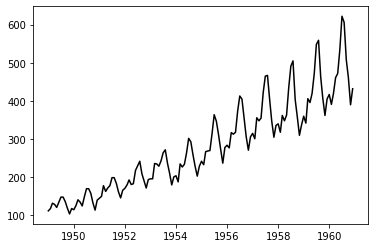

In [5]:
plt.plot(data, color='black')
plt.show()

In [6]:
def load_data(data, seq_len):
    x = []
    y = []
    for i in range(seq_len, len(data)):
        x.append(data.iloc[i-seq_len : i, 0])
        y.append(data.iloc[i, 0])
    return x, y

In [7]:
x, y = load_data(data, 6)

In [186]:
data.shape

(144, 1)

In [8]:
num = int(len(data['Passengers'])*0.8)
num

115

In [9]:
x_train = x[:num]
y_train = y[:num]
x_test = x[num:]
y_test = y[num:]

In [10]:
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

In [11]:
x_train = np.reshape(x_train, (num, 6, 1))
x_test = np.reshape(x_test, (x_test.shape[0], 6, 1))

In [12]:
print('x_train.shape = ',x_train.shape)
print('y_train.shape = ', y_train.shape)
print('x_test.shape = ', x_test.shape)
print('y_test.shape = ',y_test.shape)

x_train.shape =  (115, 6, 1)
y_train.shape =  (115,)
x_test.shape =  (23, 6, 1)
y_test.shape =  (23,)


##Define Model


In [13]:
lstmModel = Sequential()
lstmModel.add(LSTM(50, activation="ReLU", return_sequences=False, input_shape=(x_train.shape[1], 1)))
lstmModel.add(Dropout(0.1))
lstmModel.add(Dense(1))
lstmModel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50)                10400     
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________


In [16]:
lstmModel.compile(optimizer="RMSprop", loss="MSE")
lstmModel.fit(x_train, y_train, 
              validation_data = (x_test, y_test),  
              epochs=20, batch_size=50)

Epoch 1/20
3/3 [==============================] - 1s 120ms/step - loss: 3314.1340 - val_loss: 4858.3955
Epoch 2/20
3/3 [==============================] - 0s 24ms/step - loss: 2690.9526 - val_loss: 5183.9053
Epoch 3/20
3/3 [==============================] - 0s 21ms/step - loss: 1932.0609 - val_loss: 3012.5991
Epoch 4/20
3/3 [==============================] - 0s 20ms/step - loss: 1535.5999 - val_loss: 2269.1287
Epoch 5/20
3/3 [==============================] - 0s 24ms/step - loss: 1507.7172 - val_loss: 2719.9167
Epoch 6/20
3/3 [==============================] - 0s 30ms/step - loss: 2094.5234 - val_loss: 1666.9688
Epoch 7/20
3/3 [==============================] - 0s 21ms/step - loss: 1274.2555 - val_loss: 2745.6165
Epoch 8/20
3/3 [==============================] - 0s 21ms/step - loss: 1331.0789 - val_loss: 3614.7944
Epoch 9/20
3/3 [==============================] - 0s 25ms/step - loss: 1553.4673 - val_loss: 2912.3687
Epoch 10/20
3/3 [==============================] - 0s 22ms/step - loss: 

In [194]:
lstmPredict = lstmModel.predict(x_test)
lstmScore = r2_score(y_test, lstmPredict)
print("R2 Score : ", lstmScore)

R2 Score :  0.15329767570356723


In [195]:
lstmPredict.shape

(23, 1)

In [196]:
y_test.shape

(23,)

In [197]:
def plot_predictions(test, predicted, title, x):
    plt.figure(figsize=(16,4))
    plt.plot(x ,test, color='blue',label='Actual')
    plt.plot(x ,predicted, alpha=0.7, color='red',label='Predict')
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Passengers')
    plt.legend()
    plt.show()

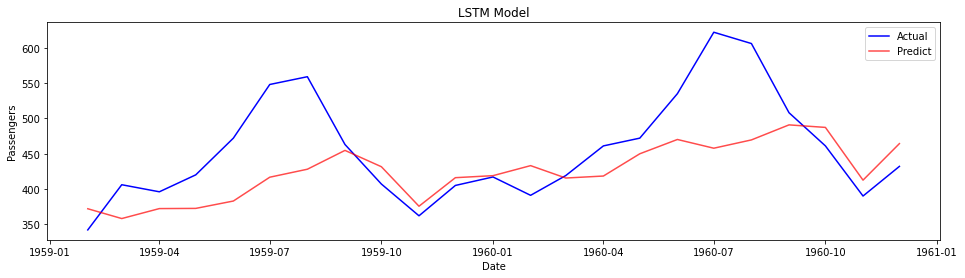

In [198]:
plot_predictions(y_test, lstmPredict, "LSTM Model", data.index[-len(y_test):])

In [199]:
lstmPredictTrain = lstmModel.predict(x_train)
lstmScore = r2_score(y_train, lstmPredictTrain)
print("R2 Score : ", lstmScore)

R2 Score :  0.8671874081176292


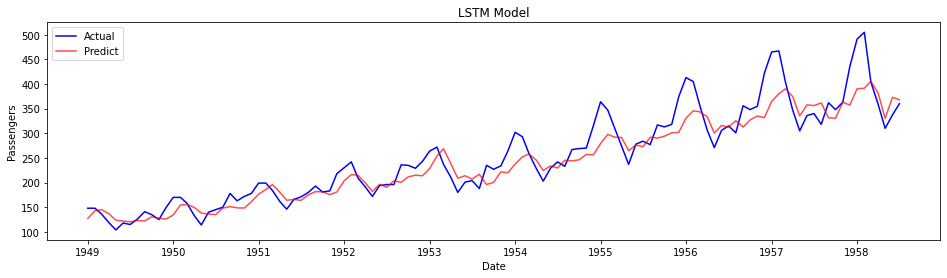

In [200]:
plot_predictions(y_train, lstmPredictTrain, "LSTM Model", data.index[:len(y_train)])

# 8. Adding Diacritic Accent

In [201]:
!wget https://dumps.wikimedia.org/viwiki/20220320/viwiki-20220320-pages-articles.xml.bz2

--2022-04-03 09:31:48--  https://dumps.wikimedia.org/viwiki/20220320/viwiki-20220320-pages-articles.xml.bz2
Resolving dumps.wikimedia.org (dumps.wikimedia.org)... 208.80.154.7, 2620:0:861:1:208:80:154:7
Connecting to dumps.wikimedia.org (dumps.wikimedia.org)|208.80.154.7|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 848538288 (809M) [application/octet-stream]
Saving to: ‘viwiki-20220320-pages-articles.xml.bz2’

viwiki-20220320-pag 100%[===================>] 809.23M  4.67MB/s    in 2m 56s  

2022-04-03 09:34:44 (4.60 MB/s) - ‘viwiki-20220320-pages-articles.xml.bz2’ saved [848538288/848538288]



In [209]:
!ls

 0.DeepLearningCourse_Introduction.gslides
 10.RecurrentNeuralNetwork
 11.Transformer
 12.GAN
 13.ModelDeployment
 14.FinalProject
'1.Programming&Math'
 2.Tensorflow
 3.Pytorch
 4.DeepNeuralNetwork
 5.CNN
 6.TransferLearning
 7.TwoStageObjectDetection
 8.SingleStageObjectDetection
 9.FaceRecognition
 data
 extension_general_backbone.ipynb
 general_backbone
 IntroductionDeepLearning.odt
 quantization.png
 viwiki-20220320-pages-articles.xml.bz2
 wikiextractor


In [210]:
!pip install wikiextractor

     |████████████████████████████████| 46 kB 2.0 MB/s 


In [211]:
!python3 -m wikiextractor.WikiExtractor viwiki-20220320-pages-articles.xml.bz2 --processes 4 -o ./data/wikipedia --json

INFO: Preprocessing 'viwiki-20220320-pages-articles.xml.bz2' to collect template definitions: this may take some time.
INFO: Preprocessed 100000 pages
INFO: Preprocessed 200000 pages
INFO: Preprocessed 300000 pages
INFO: Preprocessed 400000 pages
INFO: Preprocessed 500000 pages
INFO: Preprocessed 600000 pages
INFO: Preprocessed 700000 pages
INFO: Preprocessed 800000 pages
INFO: Preprocessed 900000 pages
INFO: Preprocessed 1000000 pages
INFO: Preprocessed 1100000 pages
INFO: Preprocessed 1200000 pages
INFO: Preprocessed 1300000 pages
INFO: Preprocessed 1400000 pages
INFO: Preprocessed 1500000 pages
INFO: Preprocessed 1600000 pages
INFO: Preprocessed 1700000 pages
INFO: Preprocessed 1800000 pages
INFO: Preprocessed 1900000 pages
INFO: Preprocessed 2000000 pages
INFO: Preprocessed 2100000 pages
INFO: Loaded 206702 templates in 362.3s
INFO: Starting page extraction from viwiki-20220320-pages-articles.xml.bz2.
INFO: Using 4 extract processes.
INFO: Extracted 100000 articles (731.2 art/s)
IN

link: https://drive.google.com/drive/folders/11mkQBCUNuKxyLZEyfGe61INU0WY-SrR0

Đọc từng file được lưu trữ tại thư mục output, lấy ra mỗi object json trong từng file bằng việc phân tách bởi ký tự xuống dòng. Với mỗi object, lấy ra giá trị của trường text, phân tách câu bởi các ký tự \n tiếp và kiểm tra tính phù hợp của câu và lưu trong file train_data.txt. Một câu được cho là phù hợp là câu có cấu thành bởi nhiều hơn 2 từ và chỉ được tạo bởi các ký tự trong bảng chữ cái tiếng Việt.

In [213]:
from tqdm import tqdm
import os
import re
PATH_DATA = "./data/wikipedia"

alphabet = '^[ _abcdefghijklmnopqrstuvwxyz0123456789áàảãạâấầẩẫậăắằẳẵặóòỏõọôốồổỗộơớờởỡợéèẻẽẹêếềểễệúùủũụưứừửữựíìỉĩịýỳỷỹỵđ!\"\',\-\.:;?_\(\)]+$'


In [214]:
# Doc noi dung cac file va luu vao cac dong cua train_data.txt
list_sub_folder = os.listdir(PATH_DATA)

for sub_folder in (list_sub_folder):
    path_sub_folder = os.path.join(PATH_DATA, sub_folder)
    
    list_file = os.listdir(path_sub_folder)
    for file in tqdm(list_file):
        with open(os.path.join(path_sub_folder, file), "r") as f_r:
            contents = f_r.read()
            contents = re.sub("(\s)+", r"\1", contents)
            contents = contents.split("\n")
            for content in contents:
                try:
                    content = eval(content)
                except:
                    continue
                lines = content["text"].split("\n")
                with open("./train_data.txt", "a") as f_w:
                    for line in lines[1:]:
                        if len(line.split()) > 2 and re.match(alphabet, line.lower()):
                            f_w.write(line + "\n")

100%|██████████| 60/60 [00:56<00:00,  1.06it/s]


## Generate dữ liệu huấn luyện


In [6]:
!pip install Unidecode

In [7]:
import re
import unidecode
import itertools
from nltk import ngrams
import string
import numpy as np
from tqdm import tqdm

In [217]:
!pip install nltk==3.6.7

     |████████████████████████████████| 1.5 MB 5.3 MB/s 
     |████████████████████████████████| 749 kB 40.7 MB/s 
  Attempting uninstall: regex
    Found existing installation: regex 2019.12.20
    Uninstalling regex-2019.12.20:
      Successfully uninstalled regex-2019.12.20
  Attempting uninstall: nltk
    Found existing installation: nltk 3.2.5
    Uninstalling nltk-3.2.5:
      Successfully uninstalled nltk-3.2.5


In [8]:
import nltk 
nltk.__version__

'3.6.7'

In [9]:
with open("train_data.txt", "r") as f_r:
    lines = f_r.read().split("\n")
    
print(len(lines))

1670441


cài đặt mô hình với đầu vào là 5-gram sinh ra từ câu( 5 token liên tiếp tạo thành). 

In [10]:
MAXLEN = 30
NGRAM = 5
BATCH_SIZE = 1024

In [11]:
def remove_accent(text):
    return unidecode.unidecode(text)

In [12]:
def extract_phrases(text):
    return re.findall(r'\w[\w ]+', text)

Tách các phrases cho toàn bộ dữ liệu, các phrases có ít hơn 2 token sẽ bị loại bỏ

In [13]:
phrases = itertools.chain.from_iterable(extract_phrases(text) for text in lines)
phrases = [p.strip() for p in phrases if len(p.split()) > 1]

sinh 5-grams

In [14]:
def gen_ngrams(words, n=5):
    return ngrams(words.split(), n)

In [15]:
list_ngrams = []
#lấy 0.1 do colab k đủ ram
phrases=phrases[0:int(len(phrases)*0.1)]
for p in tqdm(phrases):
  for ngr in gen_ngrams(p, NGRAM):
    if len(" ".join(ngr)) < 30:
      list_ngrams.append(" ".join(ngr))
del phrases
list_ngrams = list(set(list_ngrams))

100%|██████████| 933679/933679 [00:16<00:00, 56323.41it/s]


In [16]:
accented_chars_vietnamese = [
    'á', 'à', 'ả', 'ã', 'ạ', 'â', 'ấ', 'ầ', 'ẩ', 'ẫ', 'ậ', 'ă', 'ắ', 'ằ', 'ẳ', 'ẵ', 'ặ',
    'ó', 'ò', 'ỏ', 'õ', 'ọ', 'ô', 'ố', 'ồ', 'ổ', 'ỗ', 'ộ', 'ơ', 'ớ', 'ờ', 'ở', 'ỡ', 'ợ',
    'é', 'è', 'ẻ', 'ẽ', 'ẹ', 'ê', 'ế', 'ề', 'ể', 'ễ', 'ệ',
    'ú', 'ù', 'ủ', 'ũ', 'ụ', 'ư', 'ứ', 'ừ', 'ử', 'ữ', 'ự',
    'í', 'ì', 'ỉ', 'ĩ', 'ị',
    'ý', 'ỳ', 'ỷ', 'ỹ', 'ỵ',
    'đ',
]
accented_chars_vietnamese.extend([c.upper() for c in accented_chars_vietnamese])
alphabet = list(('\x00 _' + string.ascii_letters + string.digits + ''.join(accented_chars_vietnamese)))

hàm encode có vai trò chuyển một đoạn text đầu vào thành một ma trận đầu ra theo kiểu One hot vector cho kí tự và decode giúp giải mã từ ma trận encode về dạng text ban đầu.

In [17]:
def encode(text, maxlen=MAXLEN):
        text = "\x00" + text
        x = np.zeros((maxlen, len(alphabet)))
        for i, c in enumerate(text[:maxlen]):
            x[i, alphabet.index(c)] = 1
        if i < maxlen - 1:
          for j in range(i+1, maxlen):
            x[j, 0] = 1
        return x

def decode(x, calc_argmax=True):
    if calc_argmax:
        x = x.argmax(axis=-1)
    return ''.join(alphabet[i] for i in x)

Mô hình

In [20]:
from keras.models import Sequential
from keras.layers import Activation, TimeDistributed, Dense, RepeatVector, recurrent, LSTM, Bidirectional
from keras.callbacks import Callback, EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam

HIDDEN_SIZE = 256

model = Sequential()
model.add(Bidirectional(LSTM(HIDDEN_SIZE, input_shape=(MAXLEN, len(alphabet)), return_sequences=True)))
model.add(Bidirectional(LSTM(HIDDEN_SIZE, return_sequences=True, dropout=0.25, recurrent_dropout=0.1)))
model.add(TimeDistributed(Dense(len(alphabet))))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=0.001),
              metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 30, 256)           466944    
                                                                 
 bidirectional_2 (Bidirectio  (None, 30, 512)          1050624   
 nal)                                                            
                                                                 
 time_distributed_1 (TimeDis  (None, 30, 199)          102087    
 tributed)                                                       
                                                                 
 activation_2 (Activation)   (None, 30, 199)           0         
                                                                 
Total params: 1,619,655
Trainable params: 1,619,655
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
from sklearn.model_selection import train_test_split

train_data, valid_data = train_test_split(list_ngrams, test_size=0.2, random_state=2019)

In [ ]:
def generate_data(data, batch_size=128):
    cur_index = 0
    while True:
        x, y = [], []
        for i in range(batch_size):  
            y.append(encode(data[cur_index]))
            x.append(encode(unidecode.unidecode(data[cur_index])))
            cur_index += 1
            
            if cur_index > len(data)-1:
                cur_index = 0
        
        yield np.array(x), np.array(y)

In [ ]:
train_generator = generate_data(train_data, batch_size=BATCH_SIZE)
validation_generator = generate_data(valid_data, batch_size=BATCH_SIZE)

checkpointer = ModelCheckpoint(filepath=os.path.join('model_{val_loss:.4f}_{val_acc:.4f}.h5'), save_best_only=True, verbose=1)
early = EarlyStopping(patience=2, verbose=1)

model.fit_generator(train_generator, steps_per_epoch=len(train_data)//BATCH_SIZE, epochs=10,
                    validation_data=validation_generator, validation_steps=len(valid_data)//BATCH_SIZE,
                    callbacks=[checkpointer, early])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  if __name__ == '__main__':


Epoch 1/10
 9011/20516 [============>.................] - ETA: 2:43:22 - loss: 0.1620 - accuracy: 0.9540

## Dự đoán

In [ ]:
from collections import Counter
from keras.models import load_model
model = load_model("./model_0.0453_0.9854.h5")

def extract_phrases(text):
    pattern = r'\w[\w ]*|\s\W+|\W+'
    return re.findall(pattern, text)

def guess(ngram):
    text = ' '.join(ngram)
    preds = model.predict(np.array([encode(text)]), verbose=0)
    return decode(preds[0], calc_argmax=True).strip('\x00')


def add_accent(text):
    ngrams = list(gen_ngrams(text.lower(), n=NGRAM))
    guessed_ngrams = list(guess(ngram) for ngram in ngrams)
    candidates = [Counter() for _ in range(len(guessed_ngrams) + NGRAM - 1)]
    for nid, ngram in enumerate(guessed_ngrams):
        for wid, word in enumerate(re.split(' +', ngram)):
            candidates[nid + wid].update([word])
    output = ' '.join(c.most_common(1)[0][0] for c in candidates)
    return output

def accent_sentence(sentence):
  list_phrases = extract_phrases(sentence)
  output = ""
  for phrases in list_phrases:
    if len(phrases.split()) < 2 or not re.match("\w[\w ]+", phrases):
      output += phrases
    else:
      output += add_accent(phrases)
      if phrases[-1] == " ":
        output += " "
  return output

In [ ]:
text = '''Trung Quoc da mo rong anh huong cua ho trong khu vuc thong qua cac buoc leo thang ep buoc cac nuoc lang gieng o Hoa Dong, Bien Dong, boi dap dao nhan tao va quan su hoa cac cau truc dia ly tren Bien Dong trai luat phap quoc te; Tim cach chia re Hoa Ky khoi cac dong minh chau A thong qua cac no luc ep buoc va leo lai kinh te'''
print((accent_sentence(text)))